# Final Machine Learning Project

### Student - Xiaomei Wang

### Name of the project - Student stress classifier using machine learning algorithm
Design and develop Machine learning model to predict student stress level.

### Algorithm used - Logistic Regression and Naive Bayes Algorithm. 

### Dataset - Student Stress Factors: A Comprehensive Analysis
https://www.kaggle.com/datasets/rxnach/student-stress-factors-a-comprehensive-analysis/data

This dataset consists of 1100 observations & 20 numerical independent variables. Dependent and target variable is stress_level. stress_level has 3 values: 0 means low, 1 means medium, and 2 means high.

Here are the 20 independent variables: anxiety_level, self_esteem, mental_health_history, depression, headache, blood_pressure, sleep_quality, breathing_problem, noise_level, living_conditions, safety, basic_needs, academic_performance, study_load, teacher_student_relationship, future_career_concerns, social_support, peer_pressure, extracurricular_activities, bullying

The dependent variable: stress_level: class variable (0, 1, 2)
### What it does - Student stress classifier can predict student stress level as low (0), medium (1), and high (1) when input factors are given. 
The model uses Logistic Regression algorithm and Naive Bayes Algorithm as a comparison. Dataset is splitted 80% as training data, 20% as test data. The model can predict Student Stress level based on input factors. It's classification using algorithms to assign data points to predefined categories. It's a type of supervised learning and multi-class classification model. 


In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model, metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

### Step 1 - Data Exploration: Understanding the dataset and key features. Use Data Visualization tools.

In [253]:
# read data from dataset into pandas dataframe
data = pd.read_csv("StressLevelDataset.csv")

In [254]:
# print first 5 rows and last 5 rows from dataset.
print(data.head())
print(data.tail())

   anxiety_level  self_esteem  mental_health_history  depression  headache  \
0             14           20                      0          11         2   
1             15            8                      1          15         5   
2             12           18                      1          14         2   
3             16           12                      1          15         4   
4             16           28                      0           7         2   

   blood_pressure  sleep_quality  breathing_problem  noise_level  \
0               1              2                  4            2   
1               3              1                  4            3   
2               1              2                  2            2   
3               3              1                  3            4   
4               3              5                  1            3   

   living_conditions  ...  basic_needs  academic_performance  study_load  \
0                  3  ...            2        

In [255]:
# display dataset info, description
print(data.info())
print()
print(data.describe())
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

In [256]:
data.shape

(1100, 21)

In [257]:
data['stress_level'].value_counts()

stress_level
0    373
2    369
1    358
Name: count, dtype: int64

<bound method DataFrame.count of    stress_level  count
0             0    373
1             2    369
2             1    358>


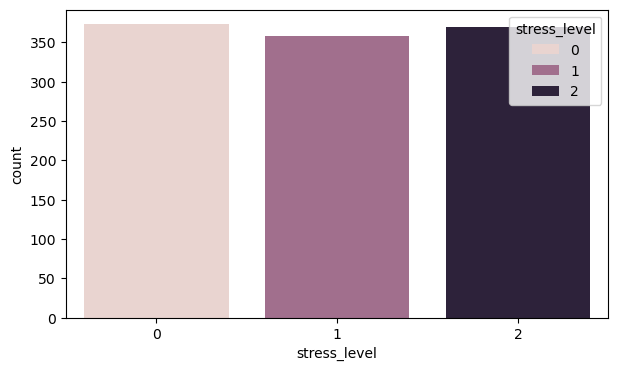

In [258]:
# use bar chart to show result of how many students have stress level low (0), medium (1), and high (2)
stress_level_counts = data["stress_level"].value_counts().reset_index()
stress_level_counts.columns = ["stress_level", "count"]
print(stress_level_counts.count)

plt.figure(figsize=(7, 4))
sns.barplot(x="stress_level", y="count", data=stress_level_counts, estimator=sum, hue="stress_level")
plt.show()

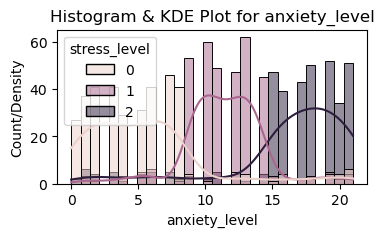

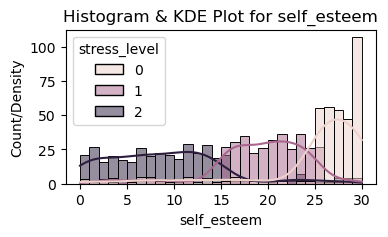

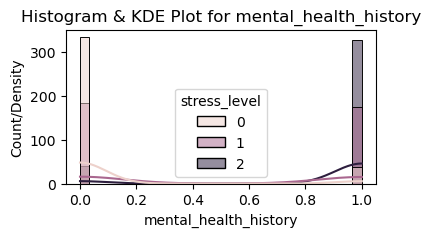

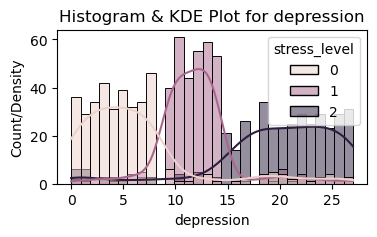

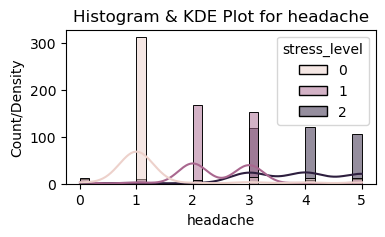

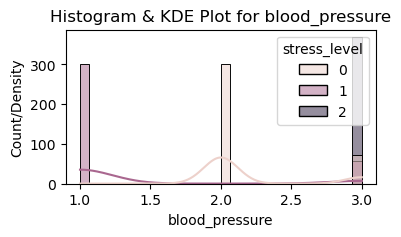

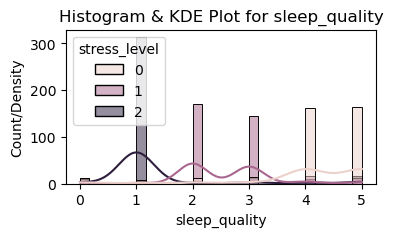

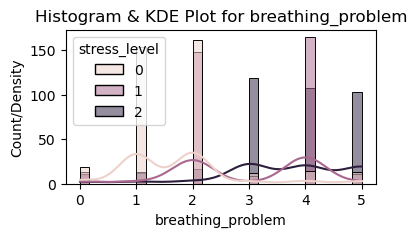

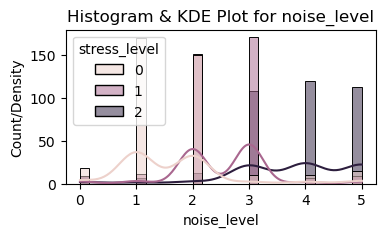

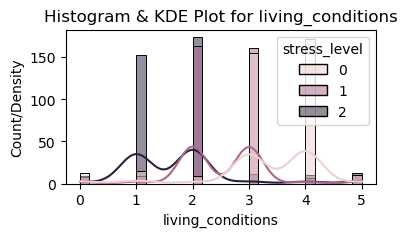

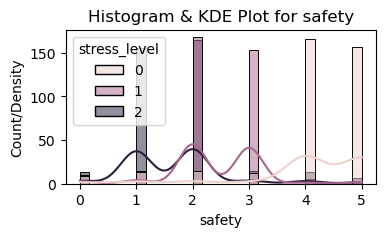

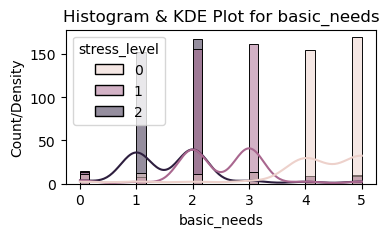

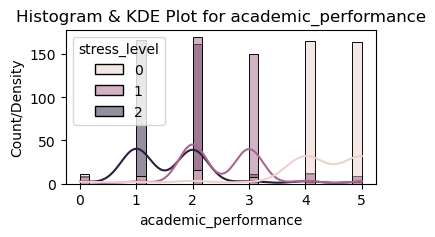

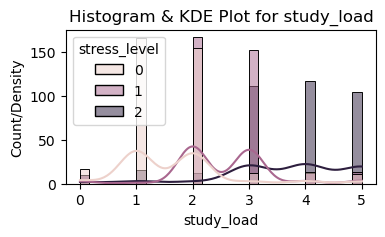

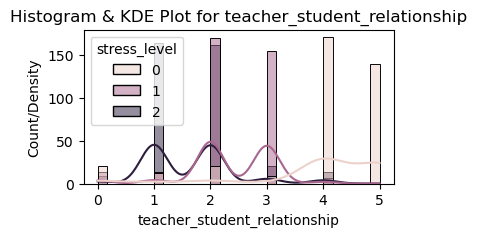

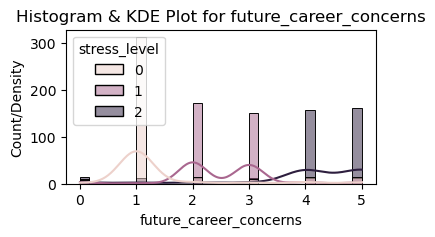

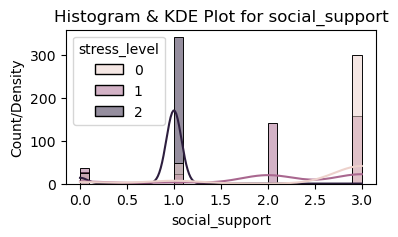

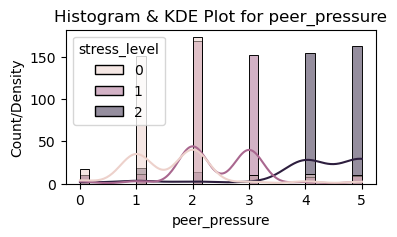

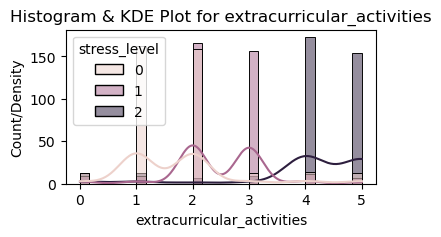

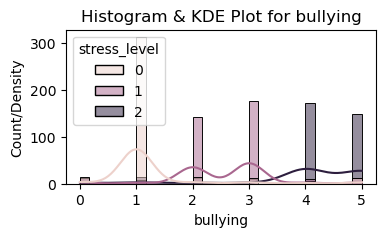

In [220]:
# draw chart during data exploration, so we use histplot to show relationships between each feature and outcome
feature_columns = data.drop(columns=["stress_level"]).columns
for feature in feature_columns:
    plt.figure(figsize=(4, 2))
    sns.histplot(data=data, x=data[feature], hue=data["stress_level"], bins=30, kde=True)
    plt.title(f"Histogram & KDE Plot for {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count/Density")
    plt.show()

### Step 2 -Data Preprocessing: Cleaning the data, handling missing values, and normalizing features.

In [259]:
# clean data by dropping null
data = data.dropna()
total_rows = len(data)
print(f"total rows after cleaning data: {total_rows}")

total rows after cleaning data: 1100


In [260]:
# We don't need to convert categorical data into numerical values since all columns are numerical data

In [261]:
# Correlation matrix
data.corr()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
anxiety_level,1.000000,-0.672745,0.634450,0.694340,0.632738,0.330867,-0.710292,0.561654,0.608624,-0.568434,...,-0.637079,-0.649601,0.586064,-0.663176,0.717016,-0.569748,0.642910,0.641022,0.709982,0.736795
self_esteem,-0.672745,1.000000,-0.603502,-0.699602,-0.626058,-0.514692,0.662693,-0.510514,-0.571169,0.550535,...,0.631212,0.639045,-0.575112,0.652934,-0.712520,0.679211,-0.607118,-0.641202,-0.640737,-0.756195
mental_health_history,0.634450,-0.603502,1.000000,0.615882,0.604826,0.295617,-0.614146,0.464347,0.515290,-0.508525,...,-0.601196,-0.586193,0.532267,-0.587728,0.625909,-0.482560,0.580602,0.554576,0.624366,0.648644
depression,0.694340,-0.699602,0.615882,1.000000,0.657700,0.436084,-0.693161,0.522540,0.566250,-0.530351,...,-0.608776,-0.633174,0.602498,-0.673853,0.706561,-0.617972,0.635544,0.648551,0.665790,0.734379
headache,0.632738,-0.626058,0.604826,0.657700,1.000000,0.361986,-0.638771,0.461719,0.543557,-0.532825,...,-0.623199,-0.622059,0.542890,-0.625928,0.679307,-0.572988,0.622581,0.582562,0.609775,0.713484
blood_pressure,0.330867,-0.514692,0.295617,0.436084,0.361986,1.000000,-0.300323,0.162308,0.352744,-0.274686,...,-0.280590,-0.262785,0.348964,-0.352123,0.434087,-0.752531,0.401392,0.426254,0.370440,0.394200
sleep_quality,-0.710292,0.662693,-0.614146,-0.693161,-0.638771,-0.300323,1.000000,-0.541687,-0.576645,0.535462,...,0.620955,0.671326,-0.551775,0.677569,-0.682130,0.554553,-0.649098,-0.623092,-0.699427,-0.749068
breathing_problem,0.561654,-0.510514,0.464347,0.522540,0.461719,0.162308,-0.541687,1.000000,0.459235,-0.448997,...,-0.508172,-0.507251,0.428791,-0.498895,0.545345,-0.365173,0.492729,0.516884,0.576341,0.573984
noise_level,0.608624,-0.571169,0.515290,0.566250,0.543557,0.352744,-0.576645,0.459235,1.000000,-0.452362,...,-0.572327,-0.513730,0.493625,-0.538758,0.575439,-0.492094,0.583817,0.563614,0.585458,0.663371
living_conditions,-0.568434,0.550535,-0.508525,-0.530351,-0.532825,-0.274686,0.535462,-0.448997,-0.452362,1.000000,...,0.503275,0.507221,-0.437732,0.549332,-0.565071,0.466594,-0.501795,-0.515794,-0.551139,-0.581723


In [262]:
# Display correlation with stress_level column
print(data.corr()["stress_level"].sort_values(ascending=False))

stress_level                    1.000000
bullying                        0.751162
future_career_concerns          0.742619
anxiety_level                   0.736795
depression                      0.734379
headache                        0.713484
extracurricular_activities      0.692977
peer_pressure                   0.690684
noise_level                     0.663371
mental_health_history           0.648644
study_load                      0.634156
breathing_problem               0.573984
blood_pressure                  0.394200
living_conditions              -0.581723
social_support                 -0.632497
teacher_student_relationship   -0.680163
basic_needs                    -0.708968
safety                         -0.709602
academic_performance           -0.720922
sleep_quality                  -0.749068
self_esteem                    -0.756195
Name: stress_level, dtype: float64


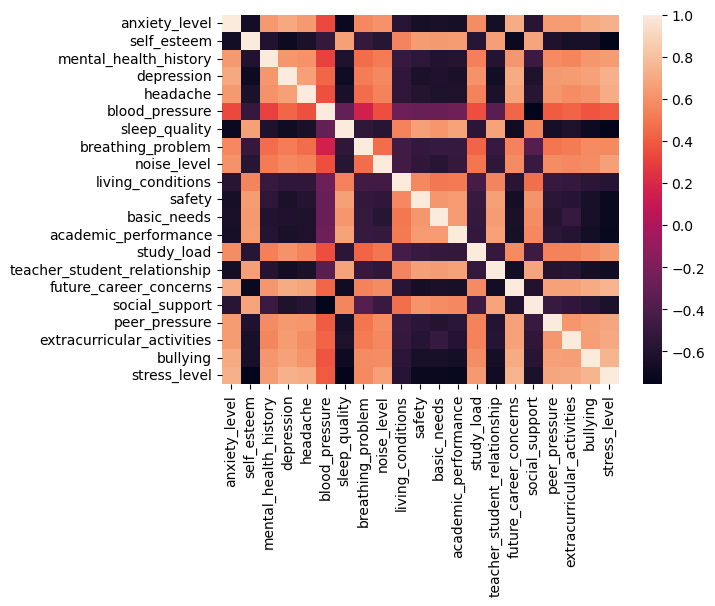

In [225]:
sns.heatmap(data.corr())
plt.show()

In [226]:
# drop unimportant features such as blood_pressure
data_clean = data.drop(["blood_pressure"],axis=1)
print(data_clean.shape)
data_clean.head(10)

(1100, 20)


,anxiety_level,self_esteem,mental_health_history,depression,headache,sleep_quality,breathing_problem,noise_level,living_conditions,safety,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,2,4,2,3,3,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,1,4,3,1,2,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,2,2,2,2,3,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,1,3,4,2,2,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,5,1,3,2,4,3,4,3,1,2,1,5,0,5,1
5,20,13,1,21,3,1,4,3,2,2,1,2,5,2,5,1,4,4,5,2
6,4,26,0,6,1,4,1,1,4,4,4,5,1,4,1,3,2,2,1,0
7,17,3,1,22,4,1,5,3,1,1,1,1,3,2,4,1,4,4,5,2
8,13,22,1,12,3,2,4,3,3,3,3,3,3,2,3,3,3,2,2,1
9,6,8,0,27,4,1,2,0,5,2,2,2,2,1,5,1,5,3,4,1


In [227]:
# scaling and nommalization excluding the last column "result"
scaler = StandardScaler()
data_clean[data_clean.columns[:-1]] = scaler.fit_transform(data_clean[data_clean.columns[:-1]])

# Display the normalized dataset top 10 rows
print(data_clean.shape)
data_clean.head(10)

(1100, 20)


,anxiety_level,self_esteem,mental_health_history,depression,headache,sleep_quality,breathing_problem,noise_level,living_conditions,safety,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,0.480208,0.248612,-0.985559,-0.201393,-0.360741,-0.426445,0.890211,-0.488949,0.430695,0.186924,-0.539196,0.160736,-0.472800,0.254213,0.229550,0.112839,0.186334,0.164249,-0.403377,1
1,0.643746,-1.093590,1.014653,0.316508,1.768859,-1.072574,0.890211,0.264334,-1.357096,-0.524551,-0.539196,-1.253741,1.047901,-1.190927,1.537869,-0.841952,0.888277,1.575763,1.557071,2
2,0.153131,0.024912,1.014653,0.187033,-0.360741,-0.426445,-0.538282,-0.488949,-0.463200,0.186924,-0.539196,-0.546502,0.287551,0.254213,-0.424609,0.112839,0.186334,-0.541508,-0.403377,1
3,0.807284,-0.646189,1.014653,0.316508,1.058992,-1.072574,0.175964,1.017616,-0.463200,-0.524551,-0.539196,-0.546502,1.047901,-1.190927,0.883709,-0.841952,0.888277,0.870006,1.557071,2
4,0.807284,1.143414,-0.985559,-0.719293,-0.360741,1.511942,-1.252529,0.264334,-0.463200,0.898398,0.158587,0.867974,0.287551,-1.190927,-0.424609,-0.841952,1.590220,-1.953023,1.557071,1
5,1.461437,-0.534339,1.014653,1.093358,0.349125,-1.072574,0.890211,0.264334,-0.463200,-0.524551,-1.236980,-0.546502,1.808252,-0.468357,1.537869,-0.841952,0.888277,0.870006,1.557071,2
6,-1.155175,0.919713,-0.985559,-0.848768,-1.070608,0.865813,-1.252529,-1.242232,1.324591,0.898398,0.856371,1.575213,-1.233150,0.976783,-1.078768,1.067629,-0.515609,-0.541508,-1.056860,0
7,0.970823,-1.652840,1.014653,1.222833,1.058992,-1.072574,1.604458,0.264334,-1.357096,-1.236025,-1.236980,-1.253741,0.287551,-0.468357,0.883709,-0.841952,0.888277,0.870006,1.557071,2
8,0.316670,0.472313,1.014653,-0.071918,0.349125,-0.426445,0.890211,0.264334,0.430695,0.186924,0.158587,0.160736,0.287551,-0.468357,0.229550,1.067629,0.186334,-0.541508,-0.403377,1
9,-0.828098,-1.093590,-0.985559,1.870208,1.058992,-1.072574,-0.538282,-1.995514,2.218486,-0.524551,-0.539196,-0.546502,-0.472800,-1.190927,1.537869,-0.841952,1.590220,0.164249,0.903589,1


### Step 3 -Modeling: Implementing and evaluating machine learning model

In [228]:
# assign independent variables and dependent variable
x = data_clean.drop(['stress_level'],axis=1)
y = data_clean['stress_level']

In [229]:
pd.DataFrame(x).describe()

,anxiety_level,self_esteem,mental_health_history,depression,headache,sleep_quality,breathing_problem,noise_level,living_conditions,safety,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying
count,1.100000e+03,1.100000e+03,1.100000e+03,1.100000e+03,1.100000e+03,1.100000e+03,1.100000e+03,1.100000e+03,1.100000e+03,1.100000e+03,1.100000e+03,1.100000e+03,1.100000e+03,1.100000e+03,1.100000e+03,1.100000e+03,1.100000e+03,1.100000e+03,1.100000e+03
mean,-1.356491e-16,-3.229740e-18,1.098112e-16,8.074349e-17,-6.943940e-17,-9.689219e-17,1.550275e-16,1.186929e-16,5.571301e-17,-1.291896e-17,-7.912862e-17,-1.626981e-16,2.091256e-16,1.501829e-16,7.589888e-17,1.291896e-17,1.259598e-16,8.558810e-17,4.683123e-17
std,1.000455e+00,1.000455e+00,1.000455e+00,1.000455e+00,1.000455e+00,1.000455e+00,1.000455e+00,1.000455e+00,1.000455e+00,1.000455e+00,1.000455e+00,1.000455e+00,1.000455e+00,1.000455e+00,1.000455e+00,1.000455e+00,1.000455e+00,1.000455e+00,1.000455e+00
min,-1.809328e+00,-1.988391e+00,-9.855588e-01,-1.625618e+00,-1.780475e+00,-1.718703e+00,-1.966776e+00,-1.995514e+00,-2.250991e+00,-1.947500e+00,-1.934764e+00,-1.960979e+00,-1.993501e+00,-1.913497e+00,-1.732927e+00,-1.796742e+00,-1.919495e+00,-1.953023e+00,-1.710343e+00
25%,-8.280983e-01,-7.580391e-01,-9.855588e-01,-8.487679e-01,-1.070608e+00,-1.072574e+00,-5.382823e-01,-4.889489e-01,-4.632004e-01,-5.245507e-01,-5.391964e-01,-5.465023e-01,-4.727998e-01,-4.683567e-01,-1.078768e+00,-8.419517e-01,-5.156090e-01,-5.415083e-01,-1.056860e+00
50%,-1.040698e-02,1.367622e-01,-9.855588e-01,-7.191751e-02,3.491253e-01,-1.033806e-01,1.759644e-01,2.643337e-01,-4.632004e-01,-5.245507e-01,1.585872e-01,-5.465023e-01,-4.727998e-01,-4.683567e-01,-4.246087e-01,1.128389e-01,-5.156090e-01,-1.886297e-01,2.501057e-01
75%,8.072843e-01,9.197134e-01,1.014653e+00,8.344079e-01,3.491253e-01,8.658128e-01,8.902111e-01,2.643337e-01,4.306951e-01,8.983982e-01,8.563708e-01,8.679743e-01,2.875508e-01,9.767832e-01,8.837095e-01,1.067629e+00,8.882770e-01,8.700062e-01,9.035886e-01
max,1.624976e+00,1.367114e+00,1.014653e+00,1.870208e+00,1.768859e+00,1.511942e+00,1.604458e+00,1.770899e+00,2.218486e+00,1.609873e+00,1.554154e+00,1.575213e+00,1.808252e+00,1.699353e+00,1.537869e+00,1.067629e+00,1.590220e+00,1.575763e+00,1.557071e+00


In [230]:
y.value_counts()

stress_level
0    373
2    369
1    358
Name: count, dtype: int64

In [231]:
# split data into training and testing sets ( 80: 20 ratio)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=7)

In [232]:
y_train.value_counts()

stress_level
0    301
2    297
1    282
Name: count, dtype: int64

In [233]:
x.shape

(1100, 19)

In [234]:
# initialize model using Logistic Regression algorithm
logReg = linear_model.LogisticRegression(solver = 'lbfgs')

# Fit the model
logReg.fit(x_train, y_train)

LogisticRegression()

In [235]:
# Predict using model on test data
y_pred = logReg.predict(x_test)

In [236]:
# print first 10 prediction values
print(y_pred[:10])

[0 1 1 1 1 1 2 1 1 2]


In [237]:
# take a look at the probability first 10 output on test data
y_pred_proba = logReg.predict_proba(x_test)
print(y_pred_proba[:10])

[[9.80081034e-01 1.98981340e-02 2.08319083e-05]
 [1.11413181e-01 7.91335319e-01 9.72515005e-02]
 [1.51390373e-02 9.72719974e-01 1.21409887e-02]
 [1.03961805e-01 8.53486994e-01 4.25512002e-02]
 [1.09035091e-01 8.62480866e-01 2.84840433e-02]
 [2.04115754e-01 7.28535496e-01 6.73487496e-02]
 [6.05892867e-05 4.15162155e-02 9.58423195e-01]
 [3.72393465e-01 6.18570488e-01 9.03604784e-03]
 [1.74648272e-01 8.06924267e-01 1.84274613e-02]
 [3.78142619e-04 3.68033861e-02 9.62818471e-01]]


### Step 4 - Evaluation: Use Evaluation Metrics to evaluate and compare if you are using more than one ML algorithm. 

In [238]:
# Find accuracy of model
accuracy = accuracy_score(y_test, y_pred)
print("accuracy:", accuracy)

accuracy: 0.8636363636363636


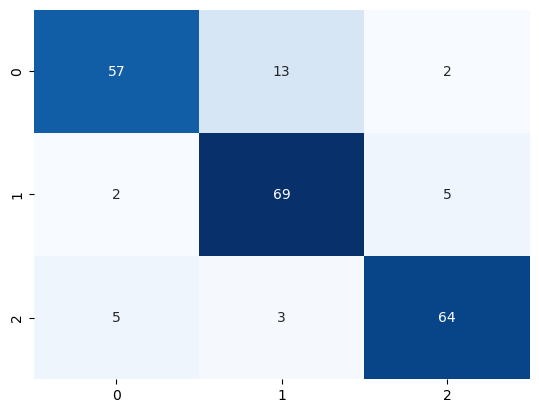

In [239]:
# Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.show()

In [240]:
# print the precision, recall, F1-score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.79      0.84        72
           1       0.81      0.91      0.86        76
           2       0.90      0.89      0.90        72

    accuracy                           0.86       220
   macro avg       0.87      0.86      0.86       220
weighted avg       0.87      0.86      0.86       220



In [241]:
# F1 score
print(f"F1 Score : {f1_score(y_test, y_pred, average='weighted')}")

F1 Score : 0.8633788671221826


In [242]:
# Calculate multi-class ROC AUC
auc = roc_auc_score(y_test, y_pred_proba, average='weighted', multi_class='ovr')
print(f"ROC AUC Score (OvR): {auc}")

ROC AUC Score (OvR): 0.9692559036309035


In [243]:
# Predict a new input data
# feature_names are in the order of "anxiety_level", "self_esteem", "mental_health_history", "depression", "headache", "sleep_quality", 
# "breathing_problem", "noise_level", "living_conditions", "safety", "basic_needs", "academic_performance", "study_load",
# "teacher_student_relationship", "future_career_concerns", "social_support", "peer_pressure", "extracurricular_activities", "bullying"
feature_names = x_train.columns
new_data1 = pd.DataFrame([[20, 50, 0, 5, 3, 4, 1, 2, 4, 5, 5, 4, 3, 4, 2, 3, 3, 2, 2]], columns=feature_names)
prediction = logReg.predict(scaler.transform(new_data1))
print("new data 1 prediction: " + str(prediction))

new_data2 = pd.DataFrame([[20, 10, 1, 5, 3, 4, 1, 2, 4, 5, 1, 1, 3, 4, 2, 1, 3, 2, 2]], columns=feature_names)
prediction = logReg.predict(scaler.transform(new_data2))
print("new data 2 prediction: " + str(prediction))

new_data3 = pd.DataFrame([[20, 3, 1, 20, 5, 4, 3, 2, 4, 5, 1, 2, 3, 2, 5, 1, 2, 1, 3]], columns=feature_names)
prediction = logReg.predict(scaler.transform(new_data3))
print("new data 3 prediction: " + str(prediction))

new data 1 prediction: [0]
new data 2 prediction: [1]
new data 3 prediction: [2]


C:\Users\marywang\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\marywang\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\marywang\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# Conclusion:

### Student stress classifier using Logistic Regression algorithm has great performance metrics with high accuracy, precision, recall, F1-score, and ROC AUC score.

Features including bullying, future_career_concerns, anxiety_level, depression, headache, extracurricular_activities, peer_rpessure, noise_level,
mental_health_history, study_load, breathing_problem are positively correlated to stress level. Blood_pressure is relatively in a smaller scale
positively correlated to stress level, so I dropped it during data preprocessing. These features increase student stress level.

Features including self_esteem, sleep_quality, academic_performance, safety, basic_needs, teacher_student_relationship,social_support, living_conditions are negatively correlated to stress level. These features help student decrease stress level.

### Extra steps - Naive Bayes algorithm for comparison

In [244]:
# initialize Naive Bayes model
Naive_Bayes_model = GaussianNB()

# fit the model
Naive_Bayes_model.fit(x_train, y_train)

# predict
y_pred_Naive_Bayes = Naive_Bayes_model.predict(x_test)
print(y_pred_Naive_Bayes[:10])

[0 1 1 1 1 1 2 1 1 2]


In [245]:
# predict probability
y_pred_proba_Naive_Bayes = Naive_Bayes_model.predict_proba(x_test)
print(y_pred_proba_Naive_Bayes[:10])

[[1.00000000e+00 4.36923810e-16 1.55473587e-43]
 [2.42485628e-09 9.99999997e-01 5.26664355e-10]
 [1.99115443e-10 1.00000000e+00 3.74441727e-19]
 [5.40702166e-07 9.99999459e-01 6.23079067e-12]
 [3.05612752e-07 9.99999694e-01 5.31913887e-21]
 [2.34847033e-07 9.99999765e-01 1.15489874e-10]
 [1.25976255e-31 2.27153627e-16 1.00000000e+00]
 [3.83995503e-03 9.96160045e-01 3.00556774e-14]
 [3.74988707e-05 9.99962501e-01 5.19122342e-13]
 [9.39968179e-27 1.84292700e-10 1.00000000e+00]]


In [246]:
# Find accuracy of model
accuracy = accuracy_score(y_test, y_pred_Naive_Bayes)
print("accuracy:", accuracy)

accuracy: 0.8636363636363636


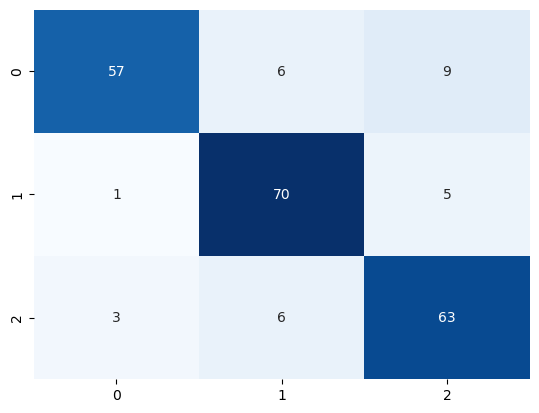

In [247]:
# Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_Naive_Bayes)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.show()

In [248]:
# print the precision, recall, F1-score
print(classification_report(y_test, y_pred_Naive_Bayes))

              precision    recall  f1-score   support

           0       0.93      0.79      0.86        72
           1       0.85      0.92      0.89        76
           2       0.82      0.88      0.85        72

    accuracy                           0.86       220
   macro avg       0.87      0.86      0.86       220
weighted avg       0.87      0.86      0.86       220



In [249]:
# F1 score
print(f"F1 Score : {f1_score(y_test, y_pred_Naive_Bayes, average='weighted')}")

F1 Score : 0.8633725632111495


In [250]:
# Calculate multi-class ROC AUC
auc = roc_auc_score(y_test, y_pred_proba_Naive_Bayes, average='weighted', multi_class='ovr')
print(f"ROC AUC Score (OvR): {auc}")

ROC AUC Score (OvR): 0.9679625648375649


In [251]:
new_data1 = pd.DataFrame([[20, 50, 0, 5, 3, 4, 1, 2, 4, 5, 5, 4, 3, 4, 2, 3, 3, 2, 2]], columns=feature_names)
prediction = Naive_Bayes_model.predict(scaler.transform(new_data1))
print("new data 1 prediction: " + str(prediction))

new_data2 = pd.DataFrame([[20, 10, 1, 5, 3, 4, 1, 2, 4, 5, 1, 1, 3, 4, 2, 1, 3, 2, 2]], columns=feature_names)
prediction = Naive_Bayes_model.predict(scaler.transform(new_data2))
print("new data 2 prediction: " + str(prediction))

new_data3 = pd.DataFrame([[20, 3, 1, 20, 5, 4, 3, 2, 4, 5, 1, 2, 3, 2, 5, 1, 2, 1, 3]], columns=feature_names)
prediction = Naive_Bayes_model.predict(scaler.transform(new_data3))
print("new data 3 prediction: " + str(prediction))

new data 1 prediction: [0]
new data 2 prediction: [1]
new data 3 prediction: [2]


C:\Users\marywang\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\marywang\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\marywang\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [252]:
# Conclusion:

# Naive Bayes model also has great performance metrics with high accuracy, precision, recall, F1-score, and ROC AUC score. The performance metrics are similar to Logistic Regression model. They both are great for student stress factors dataset prediction.

#                 Logistic Regression model    Naive Bayes model
# Accuracy score:              0.864             0.864
# Precision:                   0.87              0.87
# Recall:                      0.86              0.86
# F1 score:                    0.863             0.863
# ROC AUC Score:               0.969             0.968